In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def clean_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)

df['job_skills'] = df['job_skills'].apply(clean_list)

e:\Anaconda\envs\data_analytics_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def projected_salary(salary):
    return salary * 1.03

In [3]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda x: x*1.03)
df_salary[['salary_year_inflated', 'salary_year_avg']]

,salary_year_inflated,salary_year_avg
28,112785.00,109500.0
77,144200.00,140000.0
92,123600.00,120000.0
100,235068.66,228222.0
109,91670.00,89000.0
...,...,...
785624,143392.48,139216.0
785641,154500.00,150000.0
785648,228531.25,221875.0
785682,162225.00,157500.0


In [4]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

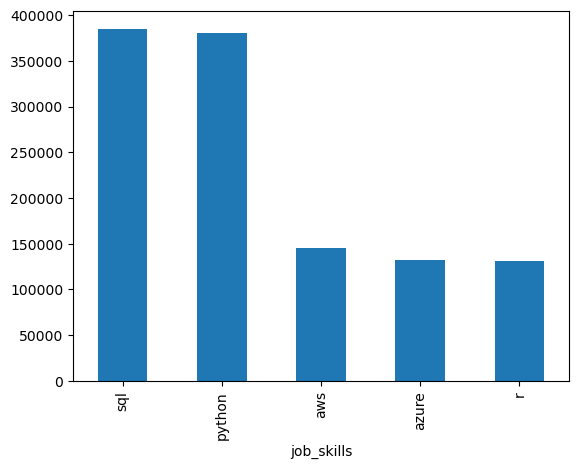

In [5]:
df_exploded['job_skills'].value_counts().head().plot(kind='bar')

Matplotlib

<Axes: ylabel='count'>

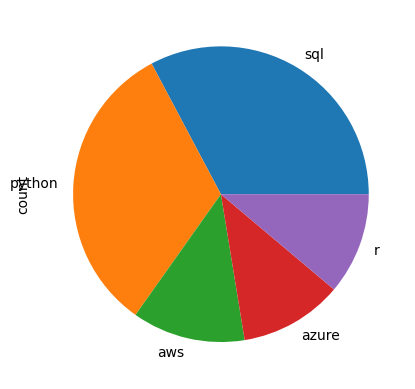

In [12]:
df_exploded['job_skills'].value_counts().head().plot(kind='pie')